In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [15]:
data=pd.read_excel("Airlines+Data.xlsx")
data 

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data[data.duplicated()]  

,Month,Passengers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe() 

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Visualisations

In [10]:
import warnings
warnings.filterwarnings('ignore') 

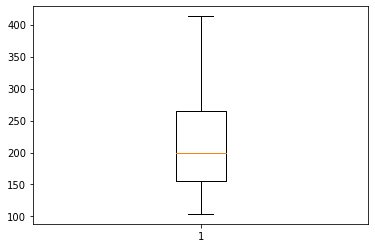

In [7]:
plt.boxplot(data['Passengers'])
plt.show()

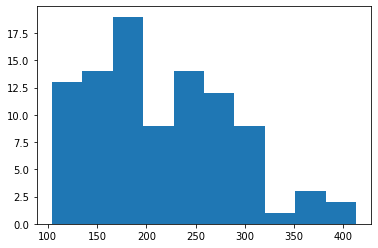

In [8]:
plt.hist(data['Passengers'])
plt.show() 

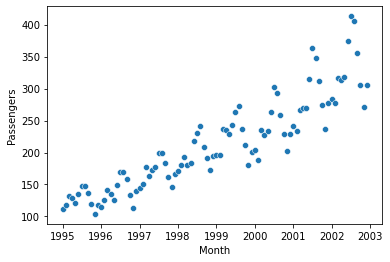

In [9]:
sns.scatterplot(x="Month", y="Passengers", data=data)
plt.show()

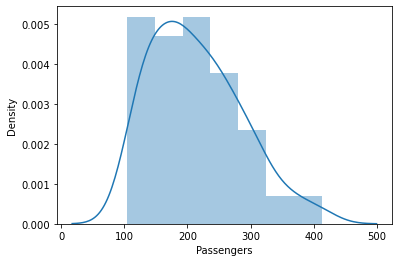

In [11]:
sns.distplot(data['Passengers'])
plt.show() 

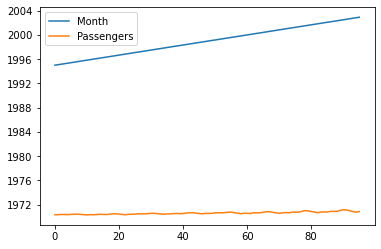

In [12]:
data.plot()
plt.show() 

from pandas.plotting import lag_plot
data= pd.read_csv('Airlines+Data.csv', header=0, index_col=0,parse_dates=True)
lag_plot(data)
plt.show() 

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags=30) #acf plot for 30 lags
plt.show() 

# Splitting the data

In [16]:
Train= data.head(80)
Test= data.tail(16) 

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose #tsa= time series analysis
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Moving Average

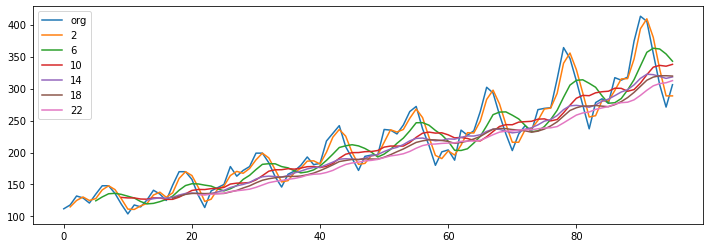

In [18]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,4):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

# Time series decomposition plot 

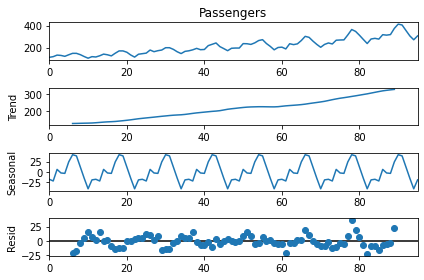

In [19]:
decompose_ts_add = seasonal_decompose(data.Passengers,freq=12)
decompose_ts_add.plot()
plt.show() 

In [20]:
def MAPE(pred,org): #MAPE = mean absolute percentage error
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

# Simple Exponential Smoothing

In [21]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

17.538105172807633

# Advanced Exponential Smoothing

## Holt Method

In [22]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

22.177551987571782

### Holts winter exponential smoothing with additive seasonality and additive trend

In [23]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)  

7.6099745542819575

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [24]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers) 

3.2167504981916455

# Final Model by combining train and test

In [25]:
data["Passengers"] = data["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [26]:
hwe_model_mul_add.forecast(10)  

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
101    392.472018
102    436.501550
103    429.860620
104    380.172862
105    332.318642
dtype: float64

In [31]:
df=pd.read_excel("Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True) 
df 


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


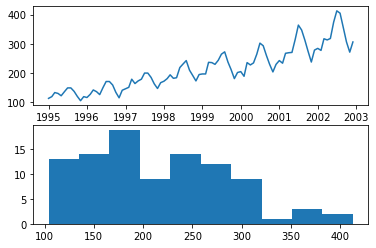

In [34]:
#line plot
plt.subplot(211)
plt.plot(df)
#hist plot
plt.subplot(212)
plt.hist(df)

plt.show() 

## Square Root Transform

In [37]:
from numpy import sqrt 
from pandas import DataFrame 

In [39]:
dataframe = DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers']) 
dataframe['Passengers']

0     10.583005
1     10.862780
2     11.489125
3     11.357817
4     11.000000
        ...    
91    20.124612
92    18.841444
93    17.492856
94    16.462078
95    17.492856
Name: Passengers, Length: 96, dtype: float64

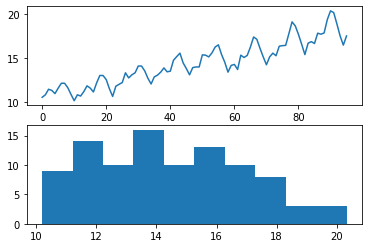

In [41]:
#line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
#hist plot
plt.subplot(212)
plt.hist(dataframe['Passengers'])

plt.show() 

## Log Transform

In [43]:
from numpy import log

dataframe2 = DataFrame(df.values)
dataframe2.columns = ['Passengers']
dataframe2['Passengers'] = log(dataframe2['Passengers'])
dataframe2['Passengers'] 

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
91    6.003887
92    5.872118
93    5.723585
94    5.602119
95    5.723585
Name: Passengers, Length: 96, dtype: float64

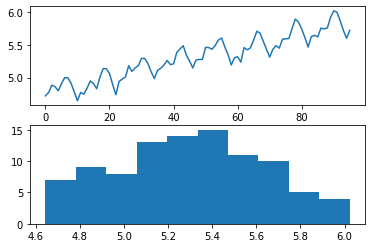

In [45]:
plt.subplot(211)
plt.plot(dataframe2['Passengers'])

plt.subplot(212)
plt.hist(dataframe2['Passengers'])

plt.show() 

### Lag plot

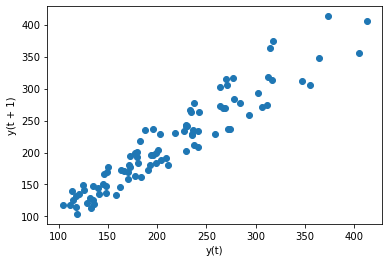

In [46]:
from pandas.plotting import lag_plot

lag_plot(df)
plt.show() 

### ACF plot

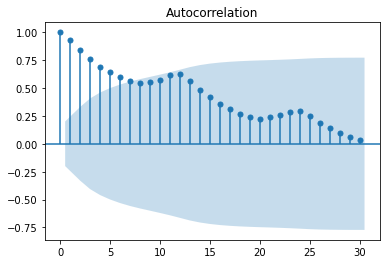

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df,lags=30) #acf plot for 30 lags
plt.show() 

## Upsampling the data

In [48]:
df1= df.resample('D').mean()
print(df1.head(32)) 

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


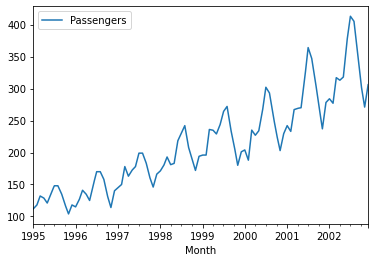

In [49]:
df2=df1.interpolate(method="linear")
print(df2.head(32))
df2.plot()

plt.show() 

In [51]:
df3= df.resample('Q').mean()
print(df1.head(12)) 

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN


            Passengers
Month                 
1995-03-31  120.666667
1995-06-30  128.333333
1995-09-30  144.000000
1995-12-31  113.666667
1996-03-31  127.333333
1996-06-30  136.333333
1996-09-30  166.000000
1996-12-31  129.000000
1997-03-31  157.666667
1997-06-30  171.000000
1997-09-30  194.000000
1997-12-31  158.000000


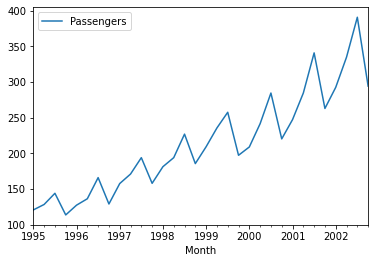

In [52]:
df4=df3.interpolate(method='linear')
print(df4.head(12))
df4.plot()

plt.show() 

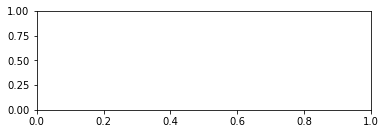

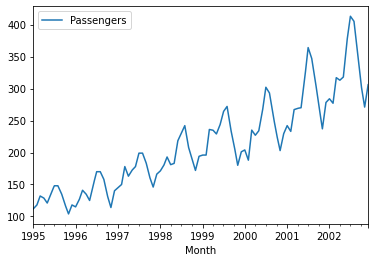

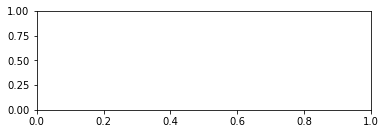

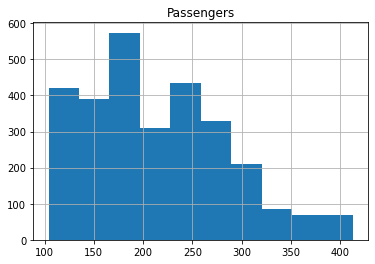

In [54]:
#day wise data
#line plot
plt.subplot(211)
df2.plot()
plt.show()
#hist plot
plt.subplot(212)
df2.hist()
plt.show() 

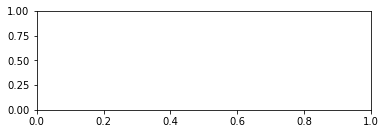

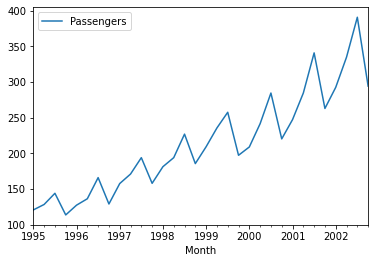

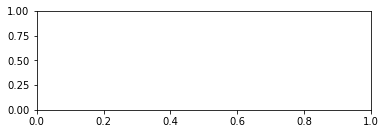

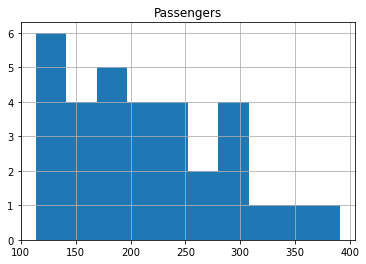

In [55]:
#quater wise data
#line plot
plt.subplot(211)
df4.plot()
plt.show()
#hist plot
plt.subplot(212)
df4.hist()
plt.show() 

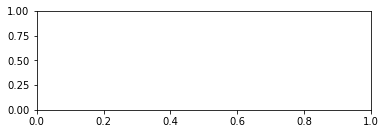

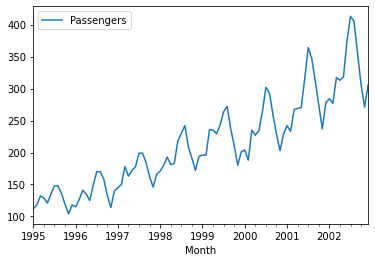

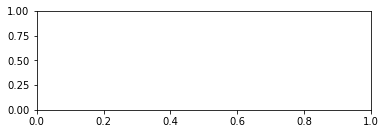

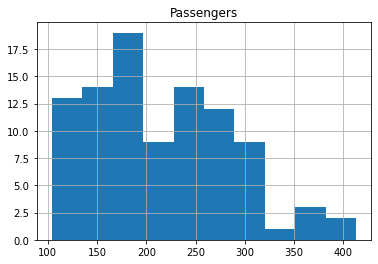

In [56]:
#Original data 
#line plot
plt.subplot(211)
df.plot()
plt.show()
#hist plot
plt.subplot(212)
df.hist()
plt.show() 